In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture 2 - Finite-dimensional linear inverse problems 

## Pseudo-inverse

Show that 

1. $KK^\dagger$ is an orthogonal projection on to the range of $K$
2. $I - K^\dagger K$ is an orthogonal projection to to the null-space of $K$

## Least-squares and minimum-norm solutions:
Given a system of equations $Ku = f$ with $K\in\mathbb{R}^{m\times n}$:

1. For $m > n$ and rank($K$) = $n$, show that the pseudo-inverse gives the solution $u = K^\dagger f$ with the smallest residual $\|Ku - f\|_2$

2. For $m < n$ and rank($K$) = $m$, show that the pseudo-inverse gives the solution $u = K^\dagger f$ with the smallest norm $\|u\|_2$

3. For $m > n$ and rank($K$) = $r < n$, show that the pseudo-inverse gives the solution that minimizes both $\|Ku - f\|_2$ and $\|u\|_2$.

## Gravity surveying

We can estimate the density distribution in the subsurface by measuing the local gravitational pull. The density profile $u(x)$ is related to such measurements by a linear operator
$$Ku(x) = \int_0^1 \frac{u(x')}{(1 + (x-x')^2)^{3/2}} \mathrm{d}x'.$$
Upon discretization with stepsize $h = 1/n$, the inverse problem can be cast as a system of $n$ equations in $n$ unknowns $Ku = f$.

1. Use the code provided below to generate the matrix and compute its SVD (use `np.linalg.svd`)
3. Plot the coefficients $\langle u_i, f\rangle$ and the singular values $\sigma_i$ to check the discrete Picard condition. What do you notice ?

2. Solve the inverse problem for noisy data using the (regularized) pseudo-inverse; compute the optimal $\alpha$ by computing the bias and variance components of the error.


In [22]:
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)
    
    return K,x

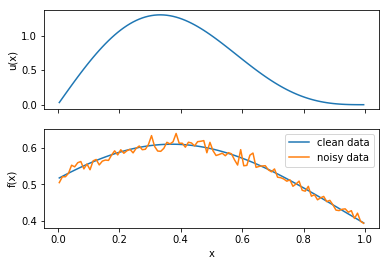

In [23]:
n = 100
delta = 1e-2
K,x = getK(n)

u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

noise = np.random.randn(n)
f_delta = f + delta*noise

fig, axs = plt.subplots(2,1,sharex=True)

axs[0].plot(x,u)
axs[0].set_ylabel('u(x)')

axs[1].plot(x,f,label='clean data')
axs[1].plot(x,f_delta,label='noisy data')

axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()